## Business Statement:

#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

#### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

#### The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

#### You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Import required libraries

In [1]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

### Reading data head

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Viewing shape of the data

In [4]:
df.shape

# There are 1460 rows and 81 columns

(1460, 81)

### Viewing basic information for the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

### Checking Null Values

In [7]:
all_null_cols_df = round(df.isnull().sum()/len(df),2)


In [8]:
null_cols = all_null_cols_df[all_null_cols_df.values>0.15]
null_cols
# We have decide to keep a threshold for null values to 15%

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [9]:
df = df.drop(list(null_cols.index),axis='columns')



In [10]:
#viewing our data frame after removing null values
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Handling missing values

In [11]:
all_null_cols_df=round(df.isnull().sum()/len(df.index),2)
# Viewing columns containing missing values 
all_null_cols_df[all_null_cols_df.values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

In [12]:
df.MasVnrType.fillna('None',inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
df.GarageYrBlt.fillna(-1,inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)

## Exploratory Data Analysis(EDA)

In [13]:
# Calculaitng remaining number of numerical and categorical features
numerical_feat = []
categorical_feat = []
for i in df.columns:
    if df[i].dtypes != 'O':
        numerical_feat.append(i)
    else:
        categorical_feat.append(i)
print('Total Numerical Features are: ', len(numerical_feat))
print('Total Categorical Features are:', len(categorical_feat))

Total Numerical Features are:  37
Total Categorical Features are: 38


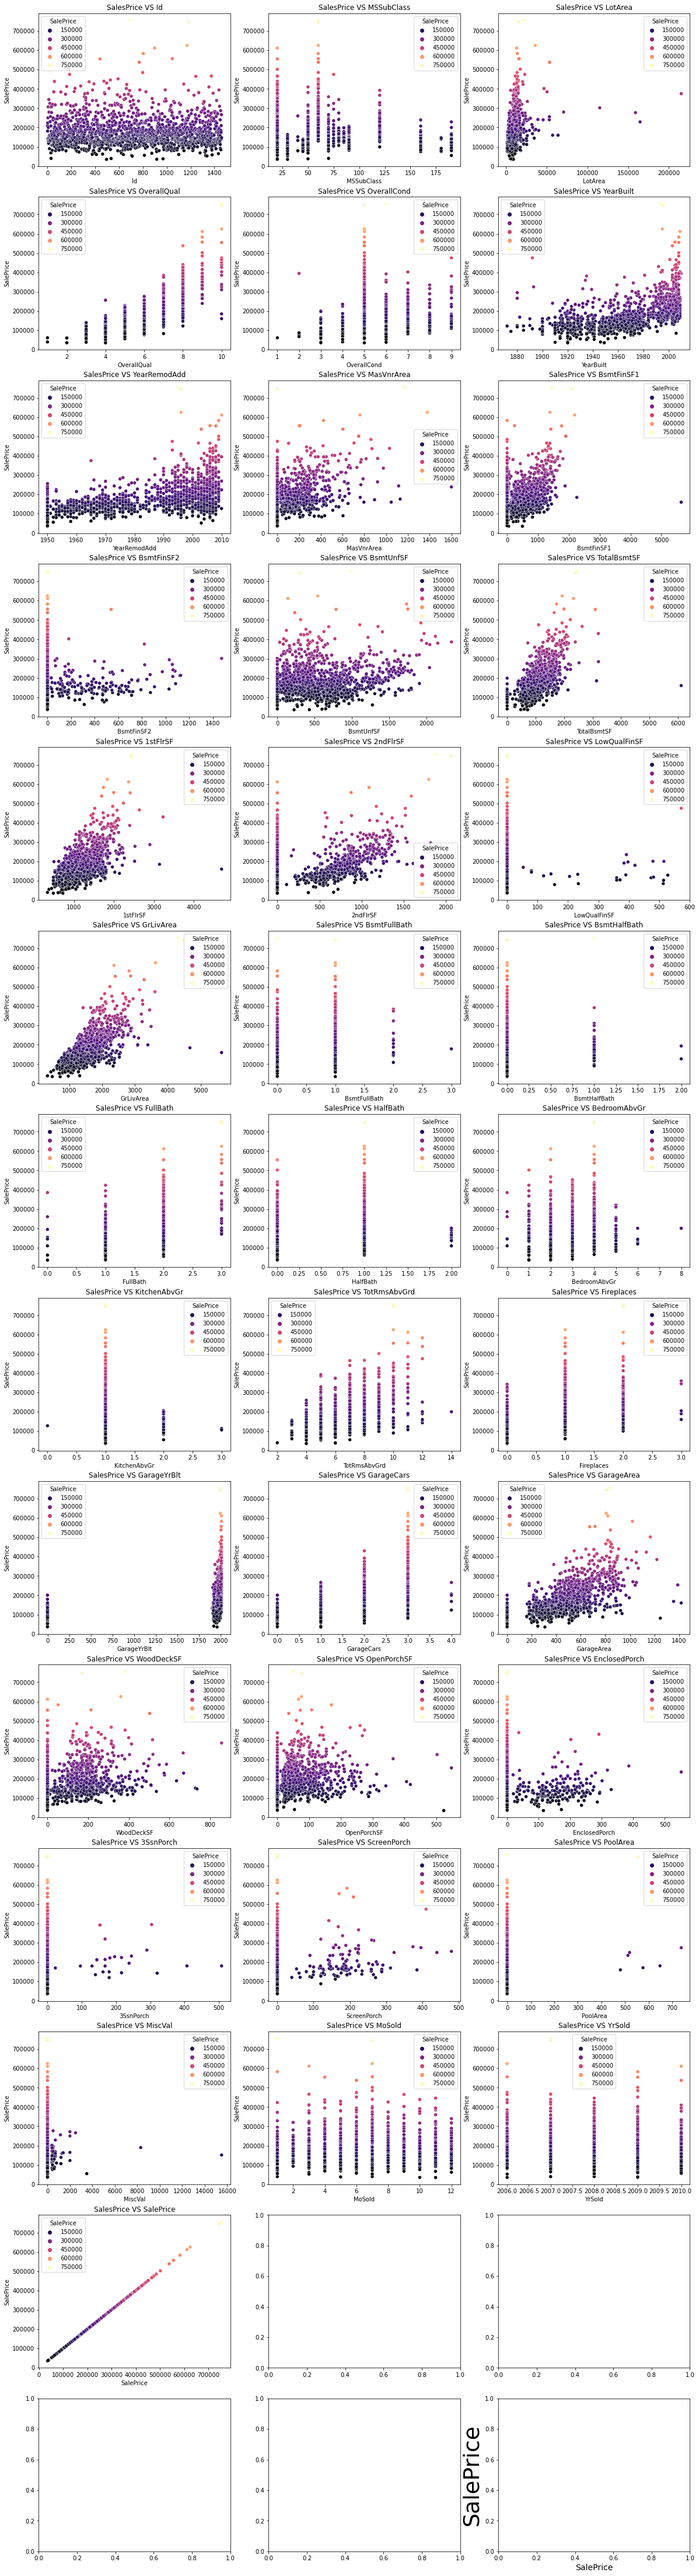

In [14]:
# Plotting graph  numerical features v/s target variable
num_df = df[numerical_feat]
fig,axs= plt.subplots(14,3,figsize=(20,80))
for i,ax in zip(num_df.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=num_df,ax=ax,palette='magma')
    plt.xlabel(i,fontsize=14)
    plt.ylabel('SalePrice',fontsize=38)
    ax.set_title('SalesPrice'+' VS '+str(i))
    
# Inferences:

## GRLiving Area is directly corelated with the price of the property.
## Total basement area and 1st floor are linearly related and directly proportional to the price.
## Pool Area and Month sold does not affect the price.

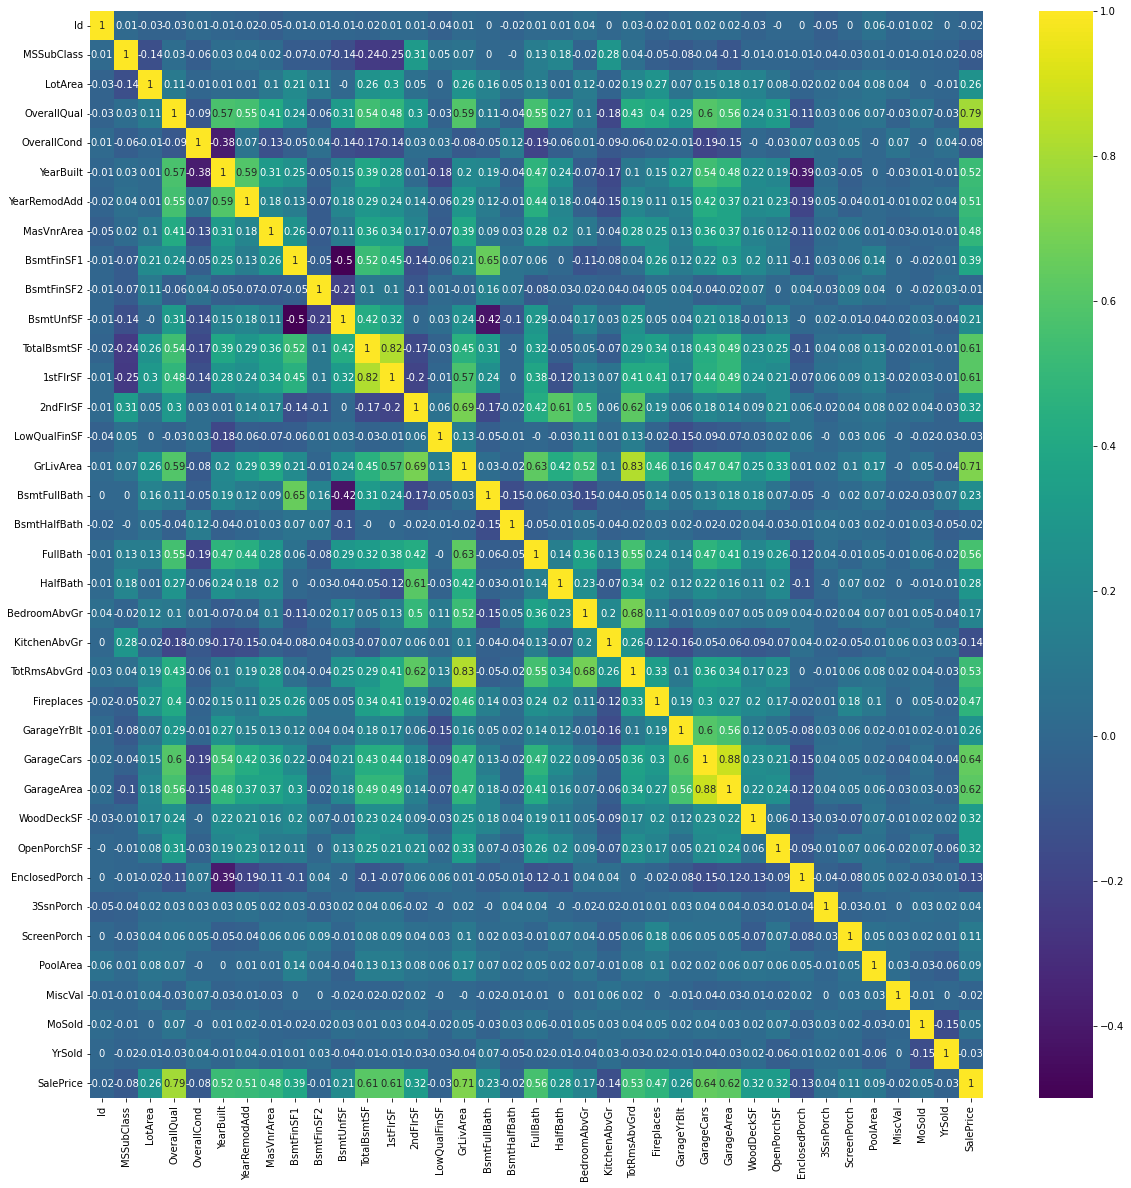

In [15]:
# Calculating correlation
plt.subplots(figsize = (20,20))
#Graph for numerical features
sns.heatmap(round(num_df.corr(),2), annot=True, fmt="g", cmap='viridis')
plt.show()

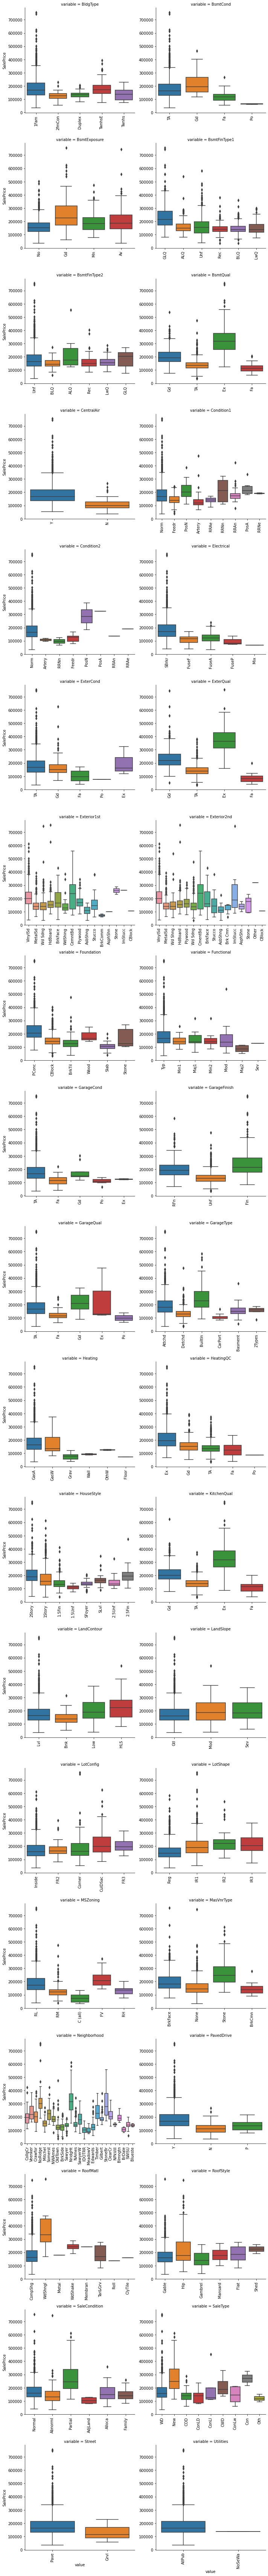

In [16]:
# Graph for categorical features V/S target variable
def boxplt(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
cat_feat_df = df[categorical_feat]
a = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(cat_feat_df))
b = sns.FacetGrid(a, col="variable", col_wrap=2, sharex=False, sharey=False, size=5)
b = b.map(boxplt, "value", "SalePrice")

In [17]:
# Dropping non required columns and preparing data for modelling

In [18]:
#Dropping Street utilities and Id as they have low variance. Id is irrelevant in our case
df = df.drop(['Street','Utilities','Id'],axis='columns')

## Removing Outliers

In [19]:
columns = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF','EnclosedPorch',
           '3SsnPorch','ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def outliers(df1):
    list = []
    for col in columns:
        low_quart = df1[col].quantile(.25)
        upper_quart = df1[col].quantile(.99)
        diff = upper_quart-low_quart
        df1 =  df1[(df1[col] >= (low_quart-(1.5*diff))) & (df1[col] <= (upper_quart+(1.5*diff)))] 
    return df1   

df = outliers(df)

# Lower quartlie is 0.25 and upper quartile at 0.99

In [20]:
# As per the data dictionary, we need to convert ordinal values to numerical

In [21]:
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [22]:
# Convert columns into dummy values
dummy_col = pd.get_dummies(df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
                                     'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType',
                                     'Foundation','Heating','Electrical','Functional','GarageType','PavedDrive','SaleType',
                                     'SaleCondition','MoSold']],drop_first=True)
df = pd.concat([df,dummy_col],axis='columns')
df = df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                          'RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Heating','Electrical',
                          'Functional','GarageType','PavedDrive','SaleType','SaleCondition','MoSold'],axis='columns')

## Data Preparation


In [23]:
# Test train split

In [24]:
df,test_df = train_test_split(df,train_size=0.75,test_size=0.25,random_state=2)


In [25]:
df.shape,test_df.shape

((1080, 193), (361, 193))

In [26]:
# Scaling test data

In [27]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
           '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
           '3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])
test_df[num_col] = scaler.transform(test_df[num_col])

In [28]:
y_train = df.pop('SalePrice')
X_train = df
y_test = test_df.pop('SalePrice')
X_test = test_df

## RFE

In [29]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=80)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=80)

In [30]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

rfe_scores

,Column_Names,Status,Rank
0,MSSubClass,True,1
1,LotArea,False,31
2,LotShape,False,89
3,LandSlope,False,90
4,OverallQual,True,1
...,...,...,...
187,SaleCondition_AdjLand,False,13
188,SaleCondition_Alloca,True,1
189,SaleCondition_Family,False,69
190,SaleCondition_Normal,True,1


In [31]:
rfe_selected_cols = list(rfe_scores[rfe_scores.Status==True].Column_Names)


In [32]:
# filtering our training and test set based on the RFE selected columns
X_train = X_train[rfe_selected_cols]
X_test = X_test[rfe_selected_cols]

## Lasso Regression

In [33]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lasso.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8895467576079908
0.8817284302454832


In [34]:
# Search grid with different values of alpha

fold_count = KFold(n_splits=10,shuffle=True,random_state=2)
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
model = Lasso()
model1 = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=fold_count,
                        verbose=3,
                        return_train_score=True
                       )

model1.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10] END ..alpha=0.001;, score=(train=0.898, test=0.737) total time=   0.0s
[CV 2/10] END ..alpha=0.001;, score=(train=0.895, test=0.835) total time=   0.0s
[CV 3/10] END ..alpha=0.001;, score=(train=0.890, test=0.887) total time=   0.0s
[CV 4/10] END ..alpha=0.001;, score=(train=0.888, test=0.901) total time=   0.0s
[CV 5/10] END ..alpha=0.001;, score=(train=0.904, test=0.533) total time=   0.0s
[CV 6/10] END ..alpha=0.001;, score=(train=0.890, test=0.857) total time=   0.0s
[CV 7/10] END ..alpha=0.001;, score=(train=0.888, test=0.902) total time=   0.0s
[CV 8/10] END ..alpha=0.001;, score=(train=0.888, test=0.899) total time=   0.0s
[CV 9/10] END ..alpha=0.001;, score=(train=0.887, test=0.899) total time=   0.0s
[CV 10/10] END .alpha=0.001;, score=(train=0.888, test=0.888) total time=   0.0s
[CV 1/10] END ...alpha=0.01;, score=(train=0.841, test=0.904) total time=   0.0s
[CV 2/10] END ...alpha=0.01;, score=(train=0.848

GridSearchCV(cv=KFold(n_splits=10, random_state=2, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=3)

In [35]:
# Finding our best parameter

model1.best_params_

{'alpha': 0.001}

In [36]:
# Calculating result

result = pd.DataFrame(model1.cv_results_)
result['param_alpha'] = result['param_alpha'].astype('float32')

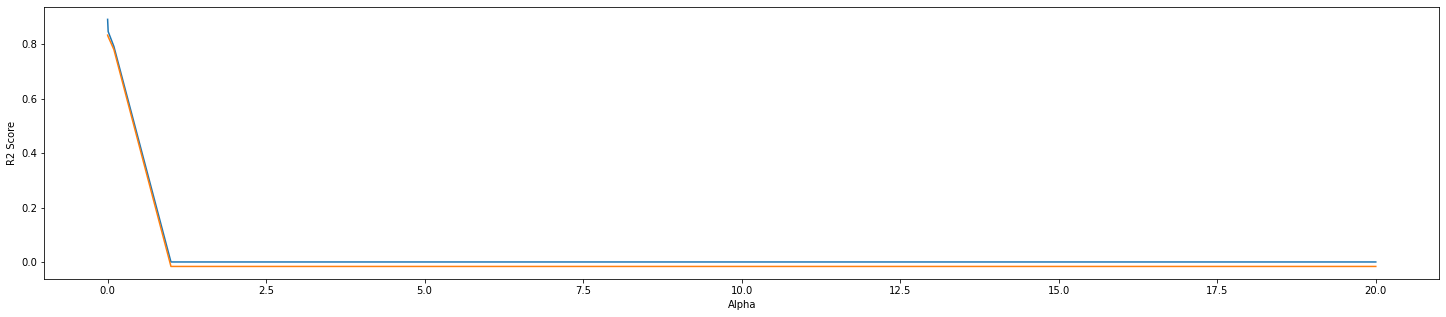

In [37]:
plt.figure(figsize=(25,5))
plt.plot(result['param_alpha'],result['mean_train_score'])
plt.plot(result['param_alpha'],result['mean_test_score'])
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [38]:
# Let's model it out with our best parameter- alpha

lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8895467576079908
0.8817284302454832


In [39]:
#  Finding best features

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [40]:
#  Calculating Lasso Coefficient

lasso_coef.sort_values(by='Coef',ascending=False).head(10)


,Feature,Coef
46,PoolArea,0.654362
77,Neighborhood_SWISU,0.408807
32,KitchenQual,0.406756
12,BsmtCond,0.349831
31,KitchenAbvGr,0.347333
30,BedroomAbvGr,0.280257
2,LotShape,0.206243
19,TotalBsmtSF,0.173706
69,Neighborhood_MeadowV,0.173390
13,BsmtExposure,0.155340


## Ridge Regression

In [41]:
#  Performing grid search with different values of ridge

fold_count  = KFold(n_splits=10,shuffle=True,random_state=2)
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
model = Ridge()
model2 = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=fold_count,
                        verbose=3,
                        return_train_score=True)
model2.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10] END ..alpha=0.001;, score=(train=0.906, test=0.623) total time=   0.0s
[CV 2/10] END ..alpha=0.001;, score=(train=0.903, test=0.816) total time=   0.0s
[CV 3/10] END ..alpha=0.001;, score=(train=0.897, test=0.889) total time=   0.0s
[CV 4/10] END ..alpha=0.001;, score=(train=0.896, test=0.887) total time=   0.0s
[CV 5/10] END ..alpha=0.001;, score=(train=0.912, test=0.584) total time=   0.0s
[CV 6/10] END ..alpha=0.001;, score=(train=0.898, test=0.870) total time=   0.0s
[CV 7/10] END ..alpha=0.001;, score=(train=0.896, test=0.905) total time=   0.0s
[CV 8/10] END ..alpha=0.001;, score=(train=0.896, test=0.894) total time=   0.0s
[CV 9/10] END ..alpha=0.001;, score=(train=0.895, test=0.905) total time=   0.0s
[CV 10/10] END .alpha=0.001;, score=(train=0.896, test=0.905) total time=   0.0s
[CV 1/10] END ...alpha=0.01;, score=(train=0.906, test=0.629) total time=   0.0s
[CV 2/10] END ...alpha=0.01;, score=(train=0.903

GridSearchCV(cv=KFold(n_splits=10, random_state=2, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=3)

In [42]:
#  Finding best parameter

model2.best_params_

{'alpha': 5.0}

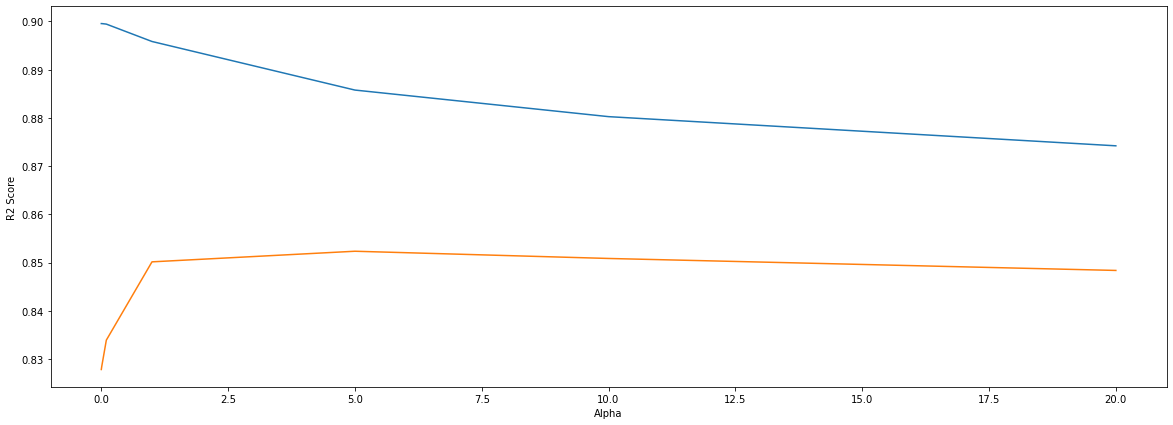

In [43]:
result2 = pd.DataFrame(model2.cv_results_)
result2['param_alpha'] = result2['param_alpha'].astype('float32')
plt.figure(figsize=(20,7))
plt.plot(result2['param_alpha'],result2['mean_train_score'])
plt.plot(result2['param_alpha'],result2['mean_test_score'])
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [44]:
#  Our best fit was 5.0 alpha, finding out better ridge using grid search

In [45]:
fold_count  = KFold(n_splits=10,shuffle=True,random_state=2)
hyper_param = {'alpha':[0.8,0.85,0.9,0.95,1.0,1.2,1.5,1.55,1.6,1.7]}
model = Ridge()
model2 = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=fold_count,
                        verbose=3,
                        return_train_score=True)
model2.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ....alpha=0.8;, score=(train=0.899, test=0.839) total time=   0.0s
[CV 2/10] END ....alpha=0.8;, score=(train=0.900, test=0.835) total time=   0.0s
[CV 3/10] END ....alpha=0.8;, score=(train=0.895, test=0.890) total time=   0.0s
[CV 4/10] END ....alpha=0.8;, score=(train=0.894, test=0.892) total time=   0.0s
[CV 5/10] END ....alpha=0.8;, score=(train=0.911, test=0.561) total time=   0.0s
[CV 6/10] END ....alpha=0.8;, score=(train=0.896, test=0.867) total time=   0.0s
[CV 7/10] END ....alpha=0.8;, score=(train=0.893, test=0.903) total time=   0.0s
[CV 8/10] END ....alpha=0.8;, score=(train=0.893, test=0.896) total time=   0.0s
[CV 9/10] END ....alpha=0.8;, score=(train=0.892, test=0.905) total time=   0.0s
[CV 10/10] END ...alpha=0.8;, score=(train=0.893, test=0.901) total time=   0.0s
[CV 1/10] END ...alpha=0.85;, score=(train=0.899, test=0.843) total time=   0.0s
[CV 2/10] END ...alpha=0.85;, score=(train=0.9

GridSearchCV(cv=KFold(n_splits=10, random_state=2, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.8, 0.85, 0.9, 0.95, 1.0, 1.2, 1.5, 1.55,
                                   1.6, 1.7]},
             return_train_score=True, scoring='r2', verbose=3)

In [46]:
model2.best_params_

{'alpha': 1.7}

In [47]:
result2 = pd.DataFrame(model2.cv_results_)
result2['param_alpha'] = result2['param_alpha'].astype('float32')

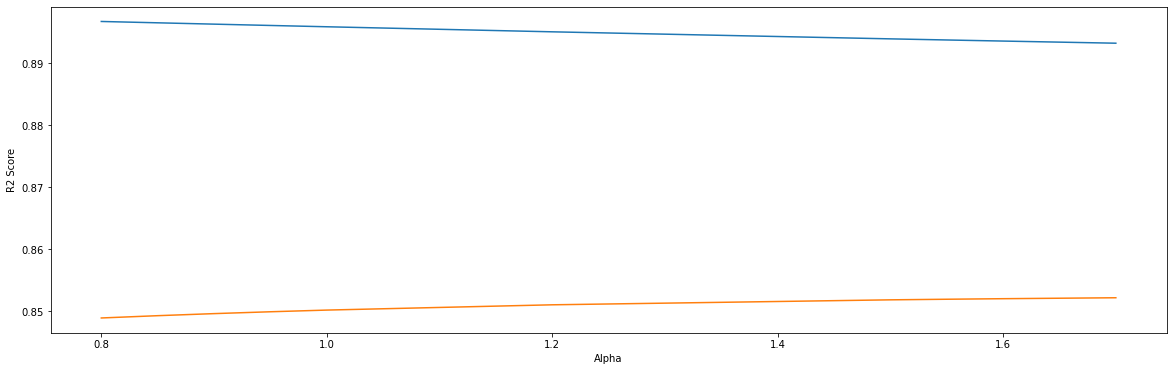

In [48]:
#  Plotting again with new alpha

plt.figure(figsize=(20,6))
plt.plot(result2['param_alpha'],result2['mean_train_score'])
plt.plot(result2['param_alpha'],result2['mean_test_score'])
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [49]:
#  Proceeding with better model

ridge = Ridge(alpha = 1.71)
ridge.fit(X_train,y_train)
y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))
y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8919698231183979
0.8753401720200917


In [50]:
# Finding best features

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [51]:
#  Calculating Ridge coefficient

ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
46,PoolArea,0.685051
32,KitchenQual,0.420505
77,Neighborhood_SWISU,0.381683
31,KitchenAbvGr,0.350222
39,GarageQual,0.314452
30,BedroomAbvGr,0.286389
76,Neighborhood_OldTown,0.263192
60,Neighborhood_Blueste,0.230278
75,Neighborhood_NridgHt,0.219865
14,BsmtFinType1,0.214384


## Final Verdict

In [52]:
#  Our analysis shows both Ridge and Lasso have given good resuts as r2_scores are similar 
#  I will go with Lasso model as it aids more in feature elimination

In [53]:
#  Top 10 features as per our models 

print(lasso_coef.sort_values(by='Coef',ascending=False).head(10)["Feature"])
print("---------------------------------------------")
print(ridge_coef.sort_values(by='Coef',ascending=False).head(10)["Feature"])

46                PoolArea
77      Neighborhood_SWISU
32             KitchenQual
12                BsmtCond
31            KitchenAbvGr
30            BedroomAbvGr
2                 LotShape
19             TotalBsmtSF
69    Neighborhood_MeadowV
13            BsmtExposure
Name: Feature, dtype: object
---------------------------------------------
46                PoolArea
32             KitchenQual
77      Neighborhood_SWISU
31            KitchenAbvGr
39              GarageQual
30            BedroomAbvGr
76    Neighborhood_OldTown
60    Neighborhood_Blueste
75    Neighborhood_NridgHt
14            BsmtFinType1
Name: Feature, dtype: object


In [182]:
#  Best alpha values calculated for Lasso and Ridge

model1.best_params_, model2.best_params_


({'alpha': 0.001}, {'alpha': 1.7})

## Evaluation for subjeective questions

In [54]:
#Lasso
lasso = Lasso(alpha=0.001*2)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8831138276557644
0.8792912142277741


In [56]:
# best features for lasso
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
46,PoolArea,0.427682
77,Neighborhood_SWISU,0.388364
32,KitchenQual,0.381370
12,BsmtCond,0.349738
31,KitchenAbvGr,0.326874
30,BedroomAbvGr,0.265563
2,LotShape,0.214158
13,BsmtExposure,0.164857
19,TotalBsmtSF,0.156727
5,OverallCond,0.148813


In [57]:
# Ridge
ridge = Ridge(alpha = 1.7*2)
ridge.fit(X_train,y_train)
y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))
y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8877678003530584
0.8768585150602903


In [58]:
# best features
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
46,PoolArea,0.545684
32,KitchenQual,0.387945
77,Neighborhood_SWISU,0.366843
31,KitchenAbvGr,0.325913
30,BedroomAbvGr,0.272939
12,BsmtCond,0.207743
2,LotShape,0.192425
39,GarageQual,0.189081
69,Neighborhood_MeadowV,0.183787
60,Neighborhood_Blueste,0.182990
